In [1]:
import scripts.framework as fr
import scripts.headrpp_alg as headrpp

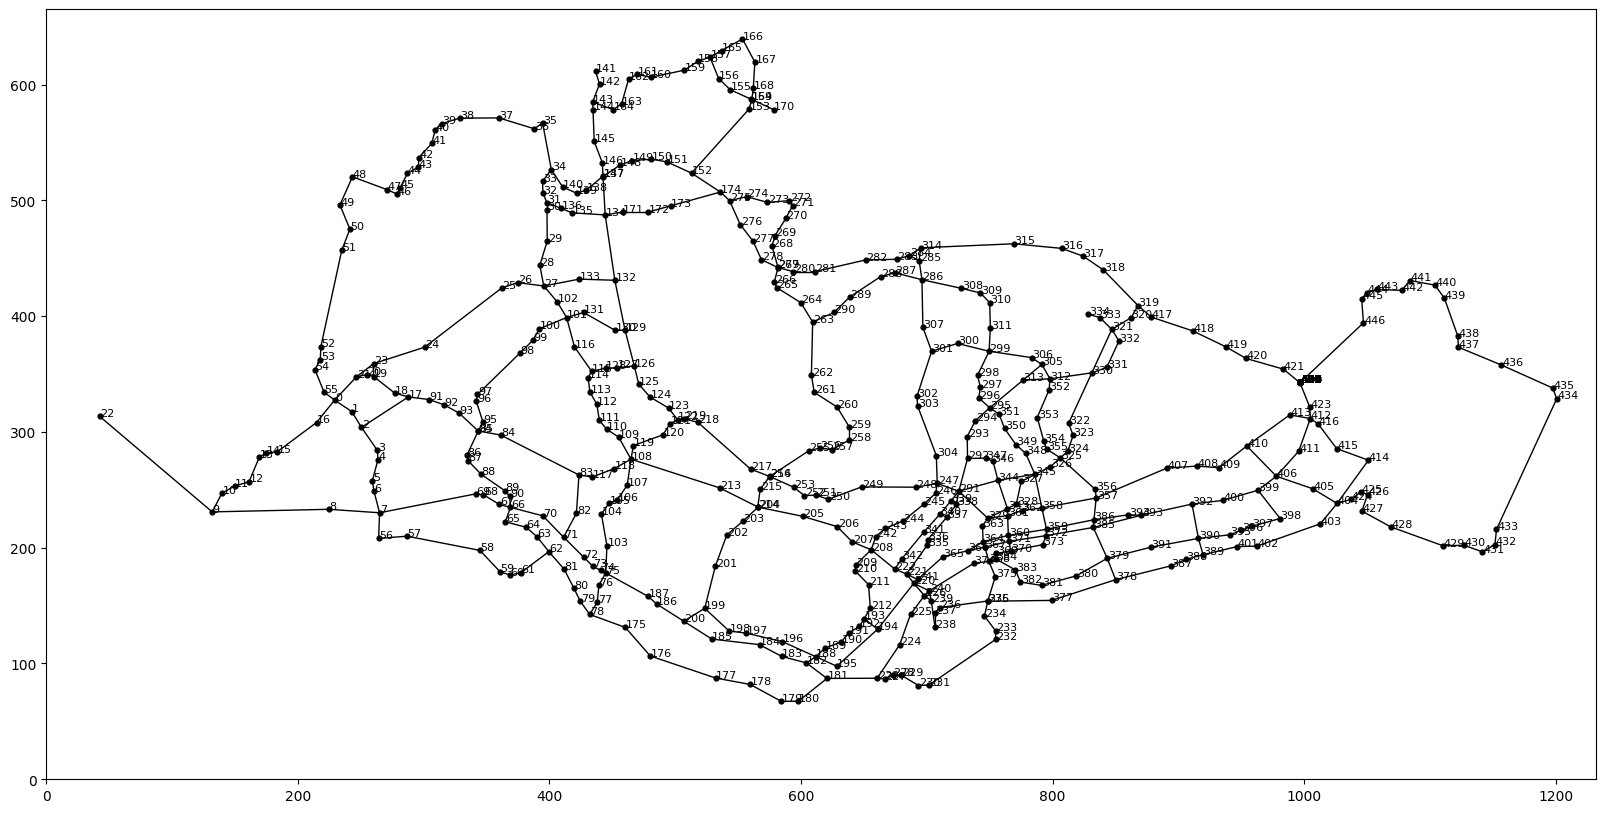

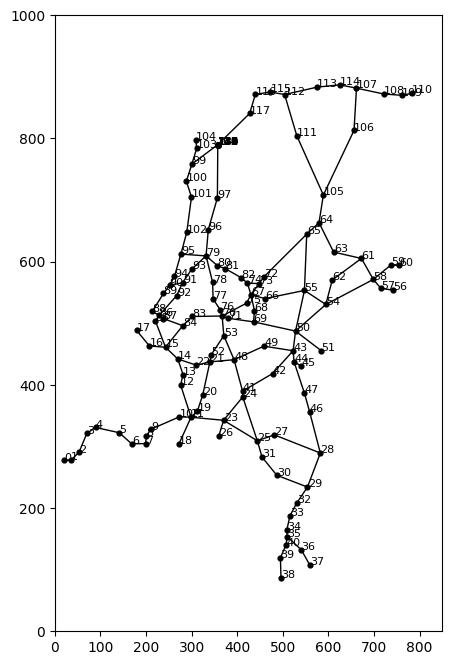

In [2]:
repr_sp = fr.Representation("./data/nodes_sp.csv", "./data/edges_sp.csv", maptype="sp")
repr_sp.plot_map(plot_nodes=True)

repr_nl = fr.Representation("./data/nodes_nl.csv", "./data/edges_nl.csv", maptype="nl")
repr_nl.plot_map(plot_nodes=True)

100%|██████████| 100/100 [00:00<00:00, 290.22it/s]


[1900.6340638364918, 1791.3401478191224, 1650.0664393793566, 1599.9021337697905, 1574.817602939136, 1571.6149902102084, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 1570.7992334456278, 

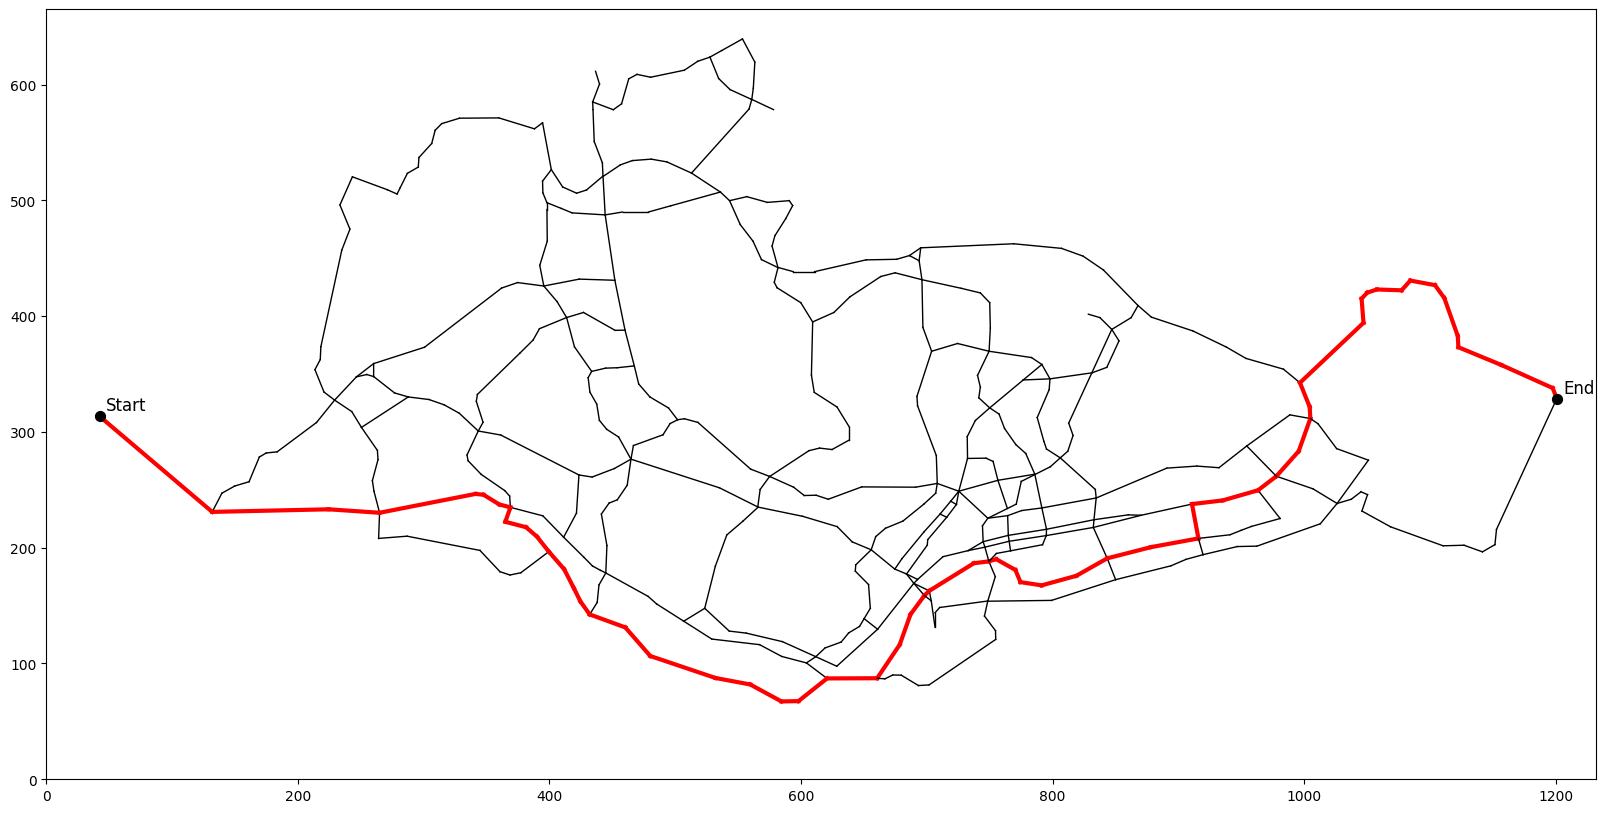

100%|██████████| 100/100 [00:00<00:00, 2244.97it/s]


[1495.7249846349978, 1437.3392760265372, 1310.80819324184, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1271.9704042226927, 1

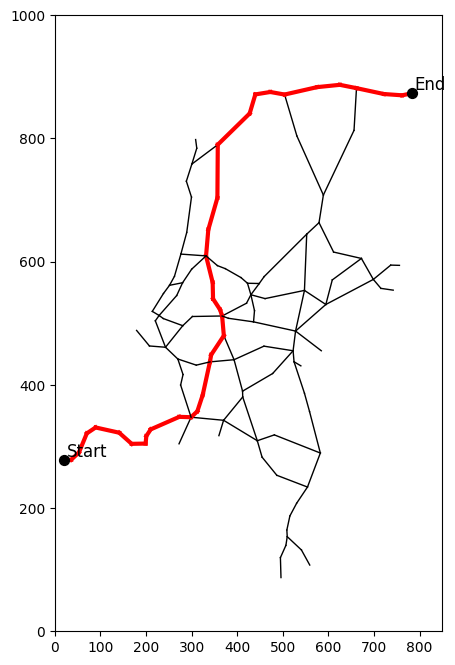

In [3]:
pop_size_sg = 50
alg = headrpp.HEADRPP(repr_sp, 100, 22, 434, pop_size_sg)
routes, avg_fitness, best_fitness = alg.run_algorithm()
print(avg_fitness)
print(best_fitness)
repr_sp.plot_map(routes[0], plot_nodes=False)
# for route in routes:
#     repr_sp.plot_map(route, plot_nodes=False)

pop_size_nl = 10
alg = headrpp.HEADRPP(repr_nl, 100, 0, 110, pop_size_nl)
routes, avg_fitness, best_fitness = alg.run_algorithm()
print(avg_fitness)
print(best_fitness)
repr_nl.plot_map(routes[0], plot_nodes=False)
# for route in routes:
#     repr_nl.plot_map(route, plot_nodes=False)